In [8]:
# Configure Jupyter so figures appear in the notebook 

%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [9]:
#Stocks are stored as State variables
init = State(R = 1000, L = 0, E = 0, V = 4e-7)
#R: Uninfected CD4 lymphocytes (white blood?) cells
#L: Lately infected cells
#E: Actively infected cells
#V: free virons

,values
R,1.000000e+03
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [10]:
#Everything else is stored in System
system = System(gamma = 1.36, #rate at which uninfected CD4 lymphocytes arise
               tau = 0.2, #the proportion of uninfected CD4  lymphocytes are activated
               mu = 0.00136, #death rate of uninfected CD4 lymphocytes 
               beta = 0.00027, #infection rate of uninfected CD4 lymphocytes
               p = 0.1, #the proportion of cells that become latenly infected cells
               q = 1- 0.1, #the number of cells that go straight to being annotated
               alpha = 0.036, #activation rate of latently infected cells
               delta = 0.33, #death rate of actively infected CD4 lymphocytes
               pi = 100, #rate of production of virons by an actively infected cell
               sigma = 2, #removal rate of cell free virons
               dt = 0.1) #small time step

,values
gamma,1.36000
tau,0.20000
mu,0.00136
beta,0.00027
p,0.10000
q,0.90000
alpha,0.03600
delta,0.33000
pi,100.00000
sigma,2.00000


In [11]:
#creates function that updates State variables for each dt and returns the new State
def update_func(state, system):
    
    new_state = state
    #equations that affect the change in State variables
    dR = system.gamma * system.tau + system.mu * state.R - system.beta * state.V * state.R
    dL = system.p * system.beta * state.V * state.R - system.mu * state.L - system.alpha * state.L
    dE = system.q * system.beta * state.V * state.R + system.alpha * state.L - system.delta * state.E
    dV = system.pi * state.E - system.sigma * state.V
   
    #applies equations to each state variable
    
    new_state.R += dR * system.dt
    new_state.L += dL * system.dt
    new_state.E += dE * system.dt
    new_state.V += dV * system.dt
    
    return new_state

In [12]:
#runs a simulation of the system and returns a time frame
def run_simulation(system, update_func):
    
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    
    for t in linrange(0, 200, system.dt):
        frame.row[t+system.dt] = update_func(frame.row[t], system)
        
    return frame

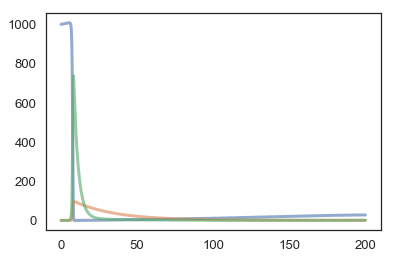

In [13]:
#plots R, L and E
results = run_simulation(system, update_func)
plot(results.R)
plot(results.L)
plot(results.E)

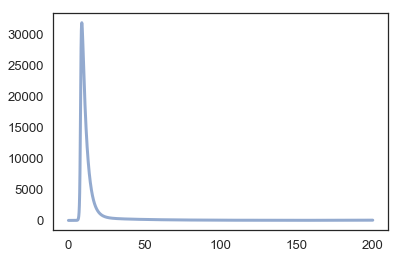

In [14]:
#plots V
results = run_simulation(system, update_func)
plot(results.V)